In [10]:
#examples that only work on the AI Tools server API ( https://github.com/SethRobinson/aitools_server ), for the vanilla 
#AUTOMATIC1111 API examples, check here:
# https://github.com/SethRobinson/aitools_server/blob/master/aitools/automatic1111_api_tester_jupyter_notebook.ipynb


In [11]:
#show AI Tools server version
import io
import requests
import json

resp = requests.get(url="http://127.0.0.1:7860/aitools/get_info.json").json()
print(resp)

{'name': "stable-diffusion-webui server modified to run Seth's AI Tools", 'version': 0.3, 'required_client_version': 0.49, 'gpu': [{'id': 0, 'abilities': 'text2image,inpaint,gfpgan', 'vram_gb': 0}]}


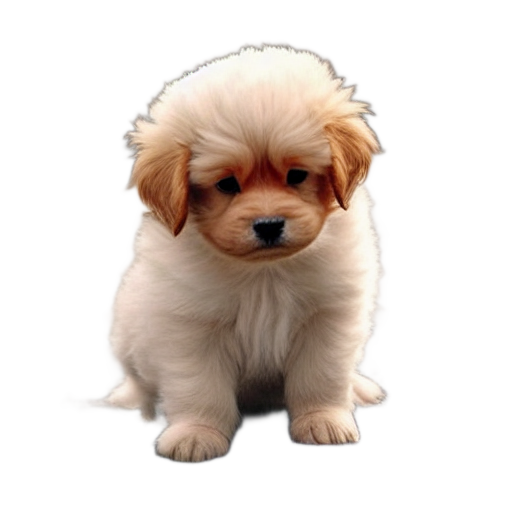

In [12]:
#AI background removal test (generates a dog, but also requests that it gets cut out via alpha channel)
#(or more accurately, it returns a .png with an alpha channel that only has the 'subject' (ie, dog) in it.  All the data is
#actually still there, but if you open the .png in photoshop, you'll see the alpha channel mask)

import io
import requests
from PIL import Image
import base64
import IPython.display
import json

payload = {
    
        "prompt": "A cute puppy",
        
        #optional parms
        "alpha_mask_subject": "true"
    
}

payloadJson = json.dumps( payload)
resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/txt2img", data=payloadJson).json()
img = Image.open(io.BytesIO(base64.b64decode(resp['images'][0])))
display(img)


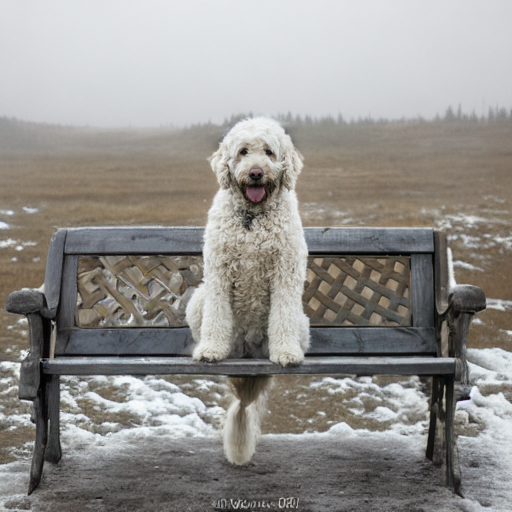

In [31]:
#The above example masks the subject after the output is done.  But what if you want to apply img2img on only the subject, 
#for example, to change the BACKGROUND of an image?

#this example does that - it uses AI to create a mask of the image it is sent, so the dog (the subject) isn't modified.

#NOTE: We are NOT using a pre-made mask here, it's being auto-generated on the fly from the image we send in!

import io
import requests
from PIL import Image
import IPython.display
import base64
import json

#grab our file from disk (a pic) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

#there are more parms we can use, but let's use only a few
payload= {
            "prompt": "dog sitting on a bench at the north pole, snow storm",
            "init_images": [pic],
            "generate_subject_mask_reverse": "true",
              
            #optional below here
            "denoising_strength": 0.8, #make higher for a stronger effect (0 to 1)
            "sampler_name": "DDIM",
            "steps": 50,
            "inpainting_fill": 1, #can be: 0 = fill, 1 = original, 2 = latent noise, 3 = latent nothing
            #there are more possible options too, too lazy to write them all
          
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/img2img",data=payloadJson ).json()

if resp.get("images") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)

else:

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)

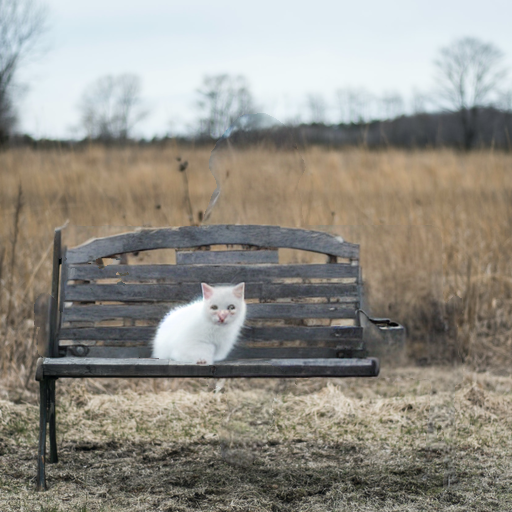

In [33]:
#like above, but we change the dog and not the background.  Note that this example is kind of
#bad because the Dog and bench don't get alpha masked very good... we try to change it to a cat.

#instead of generate_subject_mask_reverse, we use generate_subject_mask

import io
import requests
from PIL import Image
import IPython.display
import base64
import json

#grab our file from disk (a pic) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

#there are more parms we can use, but let's use only a few
payload= {
            "prompt": "a cat sitting on a bench",
            "init_images": [pic],
            "generate_subject_mask": "true",
            "generate_subject_mask_force_no_translucency": "true",
            "mask_blur" : 0,
            #optional below here
            "denoising_strength": 1.0, #make higher for a stronger effect (0 to 1)
            "sampler_name": "DDIM",
            "steps": 50,
            "inpainting_fill": 1, #can be: 0 = fill, 1 = original, 2 = latent noise, 3 = latent nothing
            #there are more possible options too, too lazy to write them all
          
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/img2img",data=payloadJson ).json()

if resp.get("images") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)

else:

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)

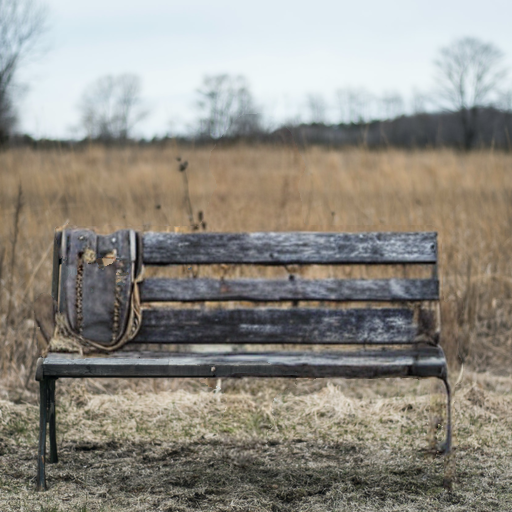

In [36]:
#Here we do something similar, but we throw in generate_subject_mask_force_no_translucency, this means the mask won't
#have any partial transparencies, this works much better for completely replacing existing data using latent noise.
#let's remove the dog completely

import io
import requests
from PIL import Image
import IPython.display
import base64
import json

#grab our file from disk (a pic) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

#there are more parms we can use, but let's use only a few
payload= {
            "prompt": "a bench in a field",
            "init_images": [pic],
            "generate_subject_mask": "true",
            "generate_subject_mask_force_no_translucency": "true",
            "mask_blur" : 0,
            #optional below here
            "denoising_strength": 1.0, #make higher for a stronger effect (0 to 1)
            "sampler_name": "DDIM",
            "steps": 50,
            "inpainting_fill": 2 #can be: 0 = fill, 1 = original, 2 = latent noise, 3 = latent nothing
            #there are more possible options too, too lazy to write them all
          
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/img2img",data=payloadJson ).json()

if resp.get("images") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)

else:

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)